In [846]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np
import re

# 시간계산을 위한 모듈
import time

# 웹 크롤링 전용 모듈
import urllib.request
from bs4 import *

# 연산시간이 오래 소요되는 메서드 진행현황 확인용 모듈
from tqdm.auto import tqdm

# MAC Matplotlib 한글 사용을 위한 초기설정
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# Matplotlib figuresize 초기설정
plt.rcParams["figure.figsize"] = (10,5)

In [1011]:
class COVID_Data:
    DataFrame = None
    
    @classmethod
    def read_covid_data(cls):
    # 'Covid19InfState.csv'의 decideCnt', 'deathCnt', 'accDefRate' 데이터를 DataFrame으로 읽기
    
        covid19_info = pd.read_csv('./Covid19InfState.csv', index_col='stateDt')
        covid19_info = pd.DataFrame(covid19_info, 
                                    columns=['decideCnt', 'deathCnt', 'accDefRate']).fillna(0)[124:519]
        covid19_info.index = covid19_info.index.astype('str')
        covid19_info.index.name = '시간'
        covid19_info.columns = ['확진자 수', '사망자 수', '확진률']
        covid19_info.columns.name = '코로나 현황정보'
        cls.DataFrame = covid19_info
        print("COVID DataFrame을 생성하였습니다.")
        
    @classmethod
    def show_accumulated_feature_chart(cls, feature):
        # 확진자 수, 사망자 수, 확진률에 대한 누적 라인차트 출력
        if feature in ['확진자 수', '사망자 수', '확진률']:
            try:
                plt.plot(cls.DataFrame[feature])
                x = sorted(set(i[:-2]+'01' for i in cls.DataFrame.index))
                plt.xticks(x, rotation=90)
            except TypeError:
                print('read_covid_data 메서드로 DataFrame을 생성해주세요.')
        else:
            print("'확진자 수', '사망자 수', '확진률' 중 하나의 요소를 입력해주세요.")

    @classmethod
    def show_changing_feature_chart(cls, feature):
        # 확진자 수, 사망자 수에 대한 변동률 라인차트 출력
        if feature in ['확진자 수', '사망자 수']:
            try:
                plt.plot(cls.DataFrame[feature].pct_change())
                x = sorted(set(i[:-2]+'01' for i in cls.DataFrame.index))
                plt.xticks(x, rotation=90)
            except TypeError:
                print('read_covid_data 메서드로 DataFrame을 생성해주세요.')
        else:
            print("'확진자 수', '사망자 수' 중 하나의 요소를 입력해주세요.")
            
    @classmethod
    def show_mulitple_accumulated_feature_chart(cls):
        # 사망자 수, 확진자 수에 대한 누적 라인차트 동시 출력 (서로 다른 y축 척도)
        try:
            figure, ax1 = plt.subplots(figsize=(10,5))
            # 월별 01일을 기준으로 나타나는 x축 눈금 설정
            xtick_info = {date:idx for idx, date in enumerate(cls.DataFrame.index) 
                          if date.endswith('01')}
            ax1.plot(cls.DataFrame['확진자 수'], color='blue')
            ax1.set_xlabel('시간')
            ax1.set_ylabel('확진자 수', color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')

            ax1.set_xticks(list(xtick_info.values()))
            ax1.set_xticklabels(list(xtick_info.keys()), rotation='vertical', fontsize=8)
            
            ax2 = ax1.twinx()
            ax2.plot(cls.DataFrame['사망자 수'], color='red')
            ax2.set_ylabel('사망자 수', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            
            ax2.set_xticks(list(xtick_info.values()))
            ax2.set_xticklabels(list(xtick_info.keys()), rotation='vertical', fontsize=8)
            
        except TypeError:
            print('read_covid_data 메서드로 DataFrame을 생성해주세요.')
        except:
            print('TypeError 이외의 예외가 발생하였습니다.')
                
    @classmethod
    def show_mulitple_changing_feature_chart(cls):
        # 사망자 수, 확진자 수에 대한 변동률 라인차트 동시 출력 (서로 다른 y축 척도)
        try:
            figure, ax1 = plt.subplots(figsize=(10,5))
            xtick_info = {date:idx for idx, date in enumerate(cls.DataFrame.index) 
                          if date.endswith('01')}
            ax1.plot(cls.DataFrame['확진자 수'].pct_change(), color='blue')
            ax1.set_xlabel('시간')
            ax1.set_ylabel('확진자 수', color='blue')
            ax1.tick_params(axis='y', labelcolor='blue')
            
            ax1.set_xticks(list(xtick_info.values()))
            ax1.set_xticklabels(list(xtick_info.keys()), rotation='vertical', fontsize=8)
            
            ax2 = ax1.twinx()
            ax2.plot(cls.DataFrame['사망자 수'].pct_change(), color='red')
            ax2.set_ylabel('사망자 수', color='red')
            ax2.tick_params(axis='y', labelcolor='red')
            
            ax2.set_xticks(list(xtick_info.values()))
            ax2.set_xticklabels(list(xtick_info.keys()), rotation='vertical', fontsize=8)
            
        except TypeError:
                print('read_covid_data 메서드로 DataFrame을 생성해주세요.')
        except:
                print('TypeError 이외의 예외가 발생하였습니다.')

In [725]:
# COVID_Data DataFrame 예시
COVID_Data.DataFrame

코로나 현황정보,확진자 수,사망자 수,확진률
일일 시간표,,,
20200501,10774.0,248.0,1.753626
20200502,10780.0,250.0,1.741333
20200503,10793.0,250.0,1.734136
20200504,10801.0,252.0,1.726102
20200505,10804.0,254.0,1.711175
...,...,...,...
20210527,138311.0,1943.0,1.449340
20210528,138898.0,1946.0,1.449938
20210529,139431.0,1951.0,1.450925


In [830]:
class MovieOptionalFeatureBox:
    # FlixPatrol 웹사이트의 영화 세부정보는 genre, subject, country 값을 불규칙하기 제공한다.
    # 일정한 형식의 틀에서 나타나는 데이터가 아니기 때문에 tag를 통해 원하는 값을 곧바로 추출하는 것이 불가능하다.
    # 따라서 'FlixPatrol_MovieInfo' 인스턴스에 대한 'optional movie info' 요소는
    # 'MovieOptionalFeatureBox' 내 세가지 리스트에 대한 포함 여부를 판단하여 할당한다.
    # 아래 데이터는 2020.06.01 부터 2021.05.31까지 한국 넷플릭스 10순위에 속한 모든 영화의
    # optional information을 중복되지 않도록 수집한 값이다.
    
    genreBOX = \
    ['Action','Action Crime','Action Heroes','Anime','Comedy','Documentary',
     'Drama','Fantasy','Fantasy Adventure','Horror','Independent Comics',
     'Postapocalypse','Rom Com','Romance','Science Fiction','Survival',
     'Thriller','Thrillers']
    subjectBOX = \
    ['Ancient Egypt','Ancient Greece','Buddies','Cars','Christmas','Conspiracy',
     'DC','Disapperance','Family','For Boys','For Girls','Gangsters','History',
     'Iraq War','Kung-fu','Marvel','Music','Musicians','Politics','Psychological',
     'Relationship','Revenge','Robots','Sd','Serial killer','Space','Superhero',
     'Terorrism','Treasure hunt','Vampires','War','Zombies','monster','sex']
    countryBOX = \
    ['Canada','China','France','Hong-Kong','Italy','Japan','Poland','South Korea',
     'United Kingdom']

class Annual_FlixPatrol_Top10:
    YEAR_MONTH_LIST = []
    FLIXPATROL_TOP10_LIST = []
    
    MOVIE_CHART_DATA_FRAMES = []
    MOVIE_INFO_DATA_FRAMES = []
    
    @classmethod
    def set_period(cls):
        # 프로그램을 실행하는 현재시간을 기준으로 지난 12개월을 기간으로 설정 
        # (FlixPatrol 웹사이트 제공 데이터 범위 : 12개월)
        now = time.localtime()
        for month in range(now.tm_mon, 13):
            cls.YEAR_MONTH_LIST.append((now.tm_year-1, month))
        for month in range(1, now.tm_mon):
            cls.YEAR_MONTH_LIST.append((now.tm_year, month))
        print(f'{now.tm_year-1}/{now.tm_mon} 부터 {now.tm_year}/{now.tm_mon-1}까지 기간이 설정되었습니다.')
            
    @classmethod
    def load_annual_movie_info(cls):
        if len(cls.YEAR_MONTH_LIST) == 0:
            print("set_period 메서드로 기간을 설정해주세요.")
        elif len(cls.YEAR_MONTH_LIST) > 12:
            print("이미 지난 12개월의 넷플릭스 Top10 영화정보가 저장되어 있습니다.")
        else:
            for year, mon in tqdm(cls.YEAR_MONTH_LIST):  # tqdm: 경과시간 확인
                month_data = FlixPatrol_Top10(year, mon)
                month_data.read_top10_chart_info()
                month_data.generate_top10_MovieInfo()
                cls.FLIXPATROL_TOP10_LIST.append((month_data, year, mon)) 
                # FlixPatrol_Top10 객체 및 시간정보 저장
            print("지난 12개월의 넷플릭스 Top10 영화정보를 불러왔습니다.")
    
    @classmethod
    def generate_MovieChart_dataframes(cls):
        if len(cls.FLIXPATROL_TOP10_LIST) == 0:
            print("load_annual_movie_info 메서드로 지난 12개월의 넷플릭스 Top10 영화정보를 불러와주세요.")
        else:
            annual_df = pd.DataFrame()
            for month_data, year, mon in tqdm(cls.FLIXPATROL_TOP10_LIST):  # tqdm: 경과시간 확인
                month_df = month_data.make_MovieChart_dataframe()
                month_df['Y/M'] = f'{year}/{mon:02d}'
                cls.MOVIE_CHART_DATA_FRAMES.append(month_df)
            print("MOVIE_CHART_DATA_FRAMES 리스트에 지난 12개월 MovieChart DataFrame을 저장하였습니다.")
                
    @classmethod
    def generate_MovieInfo_dataframes(cls):
        if len(cls.YEAR_MONTH_LIST) == 0:
            print("set_period 메서드로 기간을 설정해주세요.")
        else:
            annual_df = pd.DataFrame()
            for month_data, year, mon in tqdm(cls.FLIXPATROL_TOP10_LIST):  # tqdm: 경과시간 확인
                month_df = month_data.make_MovieInfo_dataframe()
                month_df['Y/M'] = f'{year}/{mon:02d}'
                cls.MOVIE_INFO_DATA_FRAMES.append(month_df)
            print("MOVIE_INFO_DATA_FRAMES 리스트에 지난 12개월 MovieInfo DataFrame을 저장하였습니다.")
            
    @classmethod
    def show_MovieChart_FlixPatrolPoint_chart(cls):
        # MovieChart의 FlixPatrol Point 값의 추세도 출력
        point_dict = {}
        for df in Annual_FlixPatrol_Top10.MOVIE_CHART_DATA_FRAMES:
            point_dict[df.iloc[0,-1]] = df.Point.median()
        pd.Series(point_dict).plot.bar(color='green')
        plt.title('한국 넷플릭스 선호 영화의 FlixPatrol 포인트 추세')      
    
    @classmethod
    def show_MovieInfo_feature_chart(cls, feature, cut=1):
        if feature in ['연도','주제','장르','국가']:
            total_columns = [df.iloc[0,-1] for df in Annual_FlixPatrol_Top10.MOVIE_INFO_DATA_FRAMES]
            total_dicts = []
            for df in Annual_FlixPatrol_Top10.MOVIE_INFO_DATA_FRAMES:
                genre_dict = {}
                for i, j in df[feature].value_counts().items():
                    genre_dict[i] = j
                total_dicts.append(genre_dict)

            # DataFrame 생성을 위한 dict 생성
            raw_data = {col: {} for col in total_columns}
            for i, col in enumerate(total_columns):
                raw_data[col] = total_dicts[i]

            df = pd.DataFrame(raw_data).T
            for column in df.columns:   
                if len(df[column].dropna()) <= cut: 
                    # 12개월 중 n회 이하로 등장한 주제 삭제
                    df = df.drop([column], axis=1)
            df.plot.bar(stacked=True)
            plt.title(f"한국 넷플릭스 선호 영화의 {feature} 빈도 추세", size=15)
        else:
            print("'연도', '주제', '장르', '국가' 중 하나의 요소를 입력해주세요.")
    
class FlixPatrol_Top10:
    
    def __init__(self, year, month):
        self._year = year
        self._month = month
        self._top10 = {}
        self._base_url = 'https://flixpatrol.com'
        
        self._TOP10_MOVIE_INFO = []
            
    @property
    def year(self):
        return self._year
    @year.setter
    def year(self, value):
        self._year = value
    @property
    def month(self):
        return self._month
    @month.setter
    def month(self, value):
        self._month = value
    @property
    def TOP10_MOVIE_INFO(self):
        return self._TOP10_MOVIE_INFO
    
    @staticmethod
    def default_url(year, month):
        return f'https://flixpatrol.com/top10/netflix/south-korea/{year}-{month:02d}/'

    def read_top10_chart_info(self):
        # 10순위 영화 데이터 불러오기
        search_url = FlixPatrol_Top10.default_url(self._year, self._month)
        html = urllib.request.urlopen(search_url)
        bsObject = BeautifulSoup(html, 'html.parser')
        movieRankTable = bsObject.find_all('table')[0]
        
        for e in movieRankTable.find_all('tr', {'class':'table-group'}):
            info = [i for i in re.findall('[^\n\t]+', e.get_text()) if i.isspace()==False]
            info[2] = int(info[2])  # Point 값은 정수형(int)으로 저장
            additional_info_url = base_url + e.find('a')['href']
            info.append(additional_info_url)
            self._top10[info[0][:-1]] = info[1:]
    
    def load_top10_info(self):
        # 10순위 영화 데이터가 담긴 set 반환
        if self._top10 == {}:
            print('TOP 10 정보를 불러오지 않았습니다.')
        else:
            return self._top10
        
    def generate_top10_MovieInfo(self):
        # FlixPatrol_MovieInfo 객체 생성 및 저장
        if len(self._TOP10_MOVIE_INFO) == 0:
            if self._top10 == {}:
                print('TOP 10 정보를 불러오지 않았습니다.')
            else:
                info_dict = self.load_top10_info()
                for num in info_dict.keys():
                    self._TOP10_MOVIE_INFO.append(FlixPatrol_MovieInfo(info_dict[num][2])) # 주소값 할당
        else:
            print('이미 FlixPatrol_MovieInfo 객체가 저장되어 있습니다.')
    
    def show_the_Nst_movie(self, num):
        # N번째 순위 영화의 데이터 텍스트 출력
        if not (1 <= num <= 10):
            print('1과 10 사이의 정수를 입력해주세요.')
        else:
            if self._top10 == {}:
                print('TOP 10 정보를 불러오지 않았습니다.')
            else:
                movie_info = self._top10[str(num)]
                print(f'Title: {movie_info[0]}, Point: {movie_info[1]}, URL: {movie_info[2]}')
    
    def make_MovieChart_dataframe(self):
        # 'index: 영화 순위', 'columns: 정보 유형'의 DataFrame 반환
        if self._top10 == {}:
            print('TOP 10 정보를 불러오지 않았습니다.')
        else:
            print("MovieChart DataFrame을 생성하였습니다.")
            return pd.DataFrame(self._top10, index=['Title','Point','Additional_URL']).T

            
    def make_MovieInfo_dataframe(self):
        # TOP10_MOVIE_INFO에 저장된 FlixPatrol_MovieInfo 객체를 통해 월간 10순위 영화정보 DataFrame 반환
        # 약 30초 시간 소요
        if len(self._TOP10_MOVIE_INFO) == 0:
            print('FlixPatrol_MovieInfo 객체가 저장되어있지 않습니다.')
        else:
            DF = pd.DataFrame()
            for MovieInfo in self._TOP10_MOVIE_INFO:
                MovieInfo.read_basic_movie_info()
                MovieInfo.read_optional_movie_info()
                DF = pd.concat([DF, pd.DataFrame(MovieInfo.make_series())], axis=1)
            DF.columns = range(1,len(DF.columns)+1)
            DF.columns.name = '순위'
            DF.index.name = '상세정보'
            print("MovieInfo DataFrame을 생성하였습니다.")
        return DF.T
            
class FlixPatrol_MovieInfo:
    def __init__(self, movie_url):
        # basic movie info
        self._title = None
        self._director = None
        self._year = None
        self._IMDBscore = None
        # optional movie info
        self._genre = None
        self._subject = None
        self._country = None
        # movie url
        self._movie_url = movie_url
    
    # BASIC MOVIE INFO.
    @property
    def title(self):
        return self._title
    @property
    def director(self):
        return self._director
    @property
    def year(self):
        return self._year
    @property
    def IMDBscore(self):
        return self._IMDBscore
    # OPTIONAL MOVIE INFO.
    @property
    def genre(self):
        return self._genre
    @property
    def subject(self):
        return self._subject
    @property
    def country(self):
        return self._country
    # MOVIE URL
    @property
    def movie_url(self):
        return self._movie_url
    @movie_url.setter
    def movie_url(self, value):
        self._movie_url = value
    
    def read_basic_movie_info(self):
        # 영화의 감독, 제작년도, IMDB평가점수 불러오기
        html = urllib.request.urlopen(self._movie_url)
        bsObject = BeautifulSoup(html, 'html.parser')   
        movieInfo = bsObject.find('div', {'class':'flex flex-wrap text-sm leading-6 text-gray-500'})
        
        participantsInfo = bsObject.find_all('div', {'class':'flex flex-col sm:flex-row items-baseline text-gray-400'})
        self._director = participantsInfo[-1].find_all('div')[-1].get_text()
        
        year_data = movieInfo.find('span', {'title':'Premiere'})
        if type(year_data) == type(None): 
            # year 정보가 기입되지 않는 경우
            # ex. 'https://flixpatrol.com/title/the-gangster-the-cop-the-devil/'
            self._year = None
        else:                             # year 정보가 기입된 경우
            self._year = int(year_data.get_text()[-4:])
        self._title = bsObject.find('h1', {'class':'mb-3'}).get_text()
        IMDB = bsObject.find('div', {'class':'mb-1 text-2xl text-gray-400'}).get_text()[:-3]
        if IMDB == '':
            self._IMDBscore = 'None'
        else:
            self._IMDBscore = float(IMDB)
    
    def read_optional_movie_info(self):
        # 영화의 장르, 주제, 제작국가 불러오기
        html = urllib.request.urlopen(self._movie_url)
        bsObject = BeautifulSoup(html, 'html.parser')   
        movieInfo = bsObject.find('div', {'class':'flex flex-wrap text-sm leading-6 text-gray-500'})
        
        features = [i.get_text().strip() for i in movieInfo.find_all('span') 
                    if re.search('[a-z]', i.get_text(), re.I)][1:] 
                    # Slicing을 통해 불필요한 'Movie' 정보 제외 
        
        for feature in features:
            if feature in MovieOptionalFeatureBox.genreBOX:
                self._genre = feature
            if feature in MovieOptionalFeatureBox.subjectBOX:
                self._subject = feature
            if feature in MovieOptionalFeatureBox.countryBOX:
                self._country = feature
                
    def make_series(self):
        return pd.Series({'제목': self._title,
                          '감독': self._director, 
                          '연도': self._year, 
                          'IMDB': self._IMDBscore, 
                          '장르': self._genre, 
                          '주제': self._subject, 
                          '국가': self._country})

In [812]:
# FlixPatrol_Top10 객체 DataFrame 생성 예시

movie_top10_202005 = FlixPatrol_Top10(2020,5)  
movie_top10_202005.read_top10_chart_info()
movie_top10_202005.generate_top10_MovieInfo()

movie_chart_df = movie_top10_202005.make_MovieChart_dataframe()
movie_info_df = movie_top10_202005.make_MovieInfo_dataframe()

MovieChart DataFrame을 생성하였습니다.
MovieInfo DataFrame을 생성하였습니다.


In [813]:
# 2020년 5월 10순위 목록의 '차트정보' DataFrame 예시
movie_chart_df   

,Title,Point,Additional_URL
1,Extraction,272,https://flixpatrol.com/title/extraction-2020/
2,Time to Hunt,228,https://flixpatrol.com/title/time-to-hunt/
3,The Man Standing Next,187,https://flixpatrol.com/title/the-man-standing-...
4,Zodiac,113,https://flixpatrol.com/title/zodiac-2007/
5,Constantine,105,https://flixpatrol.com/title/constantine-2005/
6,Howls Moving Castle,101,https://flixpatrol.com/title/howls-moving-castle/
7,Fast & Furious Presents: Hobbs & Shaw,92,https://flixpatrol.com/title/fast-furious-pres...
8,The Shallows,91,https://flixpatrol.com/title/the-shallows/
9,Jason Bourne,53,https://flixpatrol.com/title/jason-bourne/
10,Spirited Away,52,https://flixpatrol.com/title/spirited-away/


In [814]:
# 2020년 5월 10순위 목록의 '영화 세부정보' DataFrame 예시
movie_info_df

상세정보,제목,감독,연도,IMDB,장르,주제,국가
순위,,,,,,,
1,Extraction,Sam Hargrave,2020,6.7,Action,Terorrism,None
2,Time to Hunt,Yoon Sung-hyun,2020,6.3,Science Fiction,None,South Korea
3,The Man Standing Next,Woo Min-ho,2020,7.2,None,None,South Korea
4,Zodiac,David Fincher,2007,7.7,None,Serial killer,None
5,Constantine,"Francis Lawrence, Michael L. Fink",2005,7,None,DC,None
6,Howls Moving Castle,Hayao Miyazaki,2004,8.2,Anime,None,Japan
7,Fast & Furious Presents: Hobbs & Shaw,David Leitch,2019,6,Action,Buddies,None
8,The Shallows,Jaume Collet-Serra,2016,6.4,Horror,None,None
9,Jason Bourne,Paul Greengrass,2016,6.8,Action,None,None


In [664]:
Annual_FlixPatrol_Top10.set_period()
Annual_FlixPatrol_Top10.load_annual_movie_info()

2020/6 부터 2021/5까지 기간이 설정되었습니다.



지난 12개월의 넷플릭스 Top10 영화정보를 불러왔습니다.


In [666]:
Annual_FlixPatrol_Top10.generate_MovieInfo_dataframes()



MOVIE_INFO_DATA_FRAMES 리스트에 지난 12개월 MovieInfo DataFrame을 저장하였습니다.


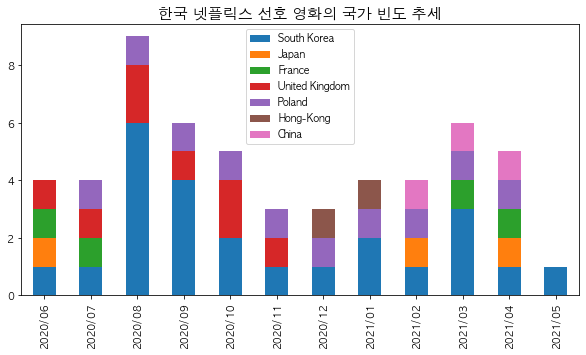

In [1039]:
Annual_FlixPatrol_Top10.show_MovieInfo_feature_chart('국가', 1)

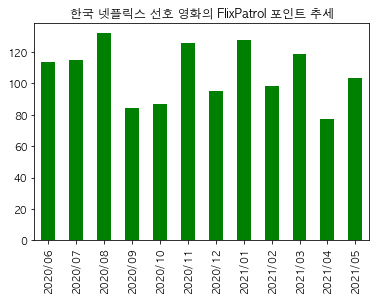

In [449]:
Annual_FlixPatrol_Top10.show_MovieChart_FlixPatrolPoint_chart()

In [1023]:
def checkTime(func):
    def new_func(*num):
        print(f"main 함수의 실행시간을 기록합니다.")
        start = time.time()
        func(*num)
        print(f"총 {time.time()-start}의 시간이 소요되었습니다.")
    return new_func

In [1018]:
# MAIN 1 : FlixPatrol_MovieInfo 객체 테스트
# FlixPatrol_MovieInfo 는 하나의 영화정보를 저장하는 클래스

@checkTime
def main1():
    # FlixPatrol_MovieInfo
    # 영화 하나에 대한 세부정보 불러오기
    
    # FlixPatrol 웹사이트에서 'We Can Be Heroes' 영화 세부정보 불러오기
    movie_info_A = FlixPatrol_MovieInfo('https://flixpatrol.com/title/we-can-be-heroes-2020/')
    movie_info_A.read_basic_movie_info()      # 영화의 감독, 제작년도, IMDB평가점수 불러오기
    movie_info_A.read_optional_movie_info()   # 영화의 장르, 주제, 제작국가 불러오기
    
    # 'We Can Be Heroes' 영화 세부정보 출력하기
    print(movie_info_A.title)     # 제목
    print(movie_info_A.genre)     # 장르정보 없음
    print(movie_info_A.subject)   # 주제
    print("-------------------------")
    
    # movie_info_A 영화정보에 대한 시리즈 반환
    print(movie_info_A.make_series())

In [1020]:
# MAIN 2 : FlixPatrol_Top10 객체 테스트
# FlixPatrol_Top10 은 한국 넷플릭스 월별 10순위에 속하는 FlixPatrol_MovieInfo 객체를 저장하는 클래스

@checkTime
def main2():
    # FlixPatrol_Top10
    # 한국 넷플릭스 월별 10순위의 '차트정보' 및 '영화 세부정보' 불러오기
    
    # FlixPatrol 웹사이트에서 2020년 5월 10순위 영화 '차트정보' 불러오기
    movie_top10_202005 = FlixPatrol_Top10(2020,5)  # 2020년 5월 FlixPatrol 차트 객체 생성
    movie_top10_202005.read_top10_chart_info()     # 10순위 차트정보 불러오기
    movie_top10_202005.generate_top10_MovieInfo()  # 10순위 차트정보의 10개 FlixPatrol_MovieInfo 객채 저장
    
    # 2020년 5월 N순위 영화 차트정보 출력 
    movie_top10_202005.show_the_Nst_movie(1)
    movie_top10_202005.show_the_Nst_movie(2)
    movie_top10_202005.show_the_Nst_movie(3)
    print()
    
    # FlixPatrol_Top10에 저장된 개별 FlixPatrol_MovieInfo 객체 데이터 접근
    movie_top10_202005.TOP10_MOVIE_INFO[0].read_basic_movie_info()
    movie_top10_202005.TOP10_MOVIE_INFO[0].read_optional_movie_info()
    print("2020/05 1순위 영화 제목: ", movie_top10_202005.TOP10_MOVIE_INFO[0].title)
    print("2020/05 1순위 영화 장르: ", movie_top10_202005.TOP10_MOVIE_INFO[0].genre) 
    print("2020/05 1순위 영화 주제: ", movie_top10_202005.TOP10_MOVIE_INFO[0].subject) 
    print()
    
    # 2020년 5월 10순위 목록의 '차트정보' 및 '영화 세부정보' DataFrame 생성
    movie_chart_df = movie_top10_202005.make_MovieChart_dataframe()
    movie_info_df = movie_top10_202005.make_MovieInfo_dataframe()  # 약 30초 소요

In [1021]:
# MAIN 3 : Annual_FlixPatrol_Top10 클래스 테스트
# Annual_FlixPatrol_Top10 지난 12개월의 FlixPatrol_Top10 객체를 저장하는 클래스
# 해당 프로그램에서 FlixPatrol 넷플릭스 영화정보에 대한 모든 것을 관리

@checkTime
def main3():
    # Annual_FlixPatrol_Top10
    # 지난 12개월 한국 넷플릭스 10순위의 '차트정보' 및 '영화 세부정보' 불러오기
    
    # 현 시간을 기준으로 지난 12개월 기간 설정
    Annual_FlixPatrol_Top10.set_period()           
    Annual_FlixPatrol_Top10.load_annual_movie_info()
    
    # 지난 12개월 한국 넷플릭스 10순위 '영화 세부정보' DataFrame 생성
    Annual_FlixPatrol_Top10.generate_MovieInfo_dataframes()
    
    # 지난 12개월 한국 넷플릭스 10순위 '영화 세부정보'의 stacked bar 차트 출력
    # '장르', '주제', '국가', '연도' 세부정보 선택 가능
    # cut=N 값을 설정하여 12개월 내 N개 이하의 빈도수로 나타난 값 삭제
    Annual_FlixPatrol_Top10.show_MovieInfo_feature_chart('장르', cut=2)
    Annual_FlixPatrol_Top10.show_MovieInfo_feature_chart('주제', cut=2)
    Annual_FlixPatrol_Top10.show_MovieInfo_feature_chart('국가', cut=2)
    Annual_FlixPatrol_Top10.show_MovieInfo_feature_chart('연도', cut=2)

In [1030]:
@checkTime
def main4():
    # COVID_Data
    # 지난 12개월 코로나 19 현황정보 불러오기
    
    # 'Covid19InfState.csv'의 decideCnt', 'deathCnt', 'accDefRate' 데이터 불러오기
    COVID_Data.read_covid_data()
    
    # '확진자 수', '사망자 수', '확진률'에 대한 누적 라인차트 출력
    COVID_Data.show_accumulated_feature_chart('확진자 수')
    COVID_Data.show_mulitple_accumulated_feature_chart()
    COVID_Data.show_mulitple_changing_feature_chart()

MAIN 4 : COVID_Data 클래스 테스트

main 함수의 실행시간을 기록합니다.
COVID DataFrame을 생성하였습니다.
총 0.3232901096343994의 시간이 소요되었습니다.



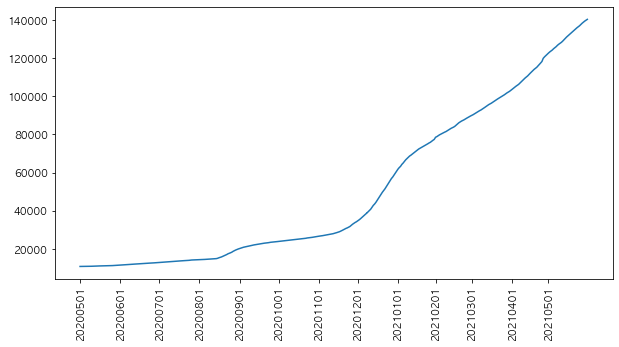

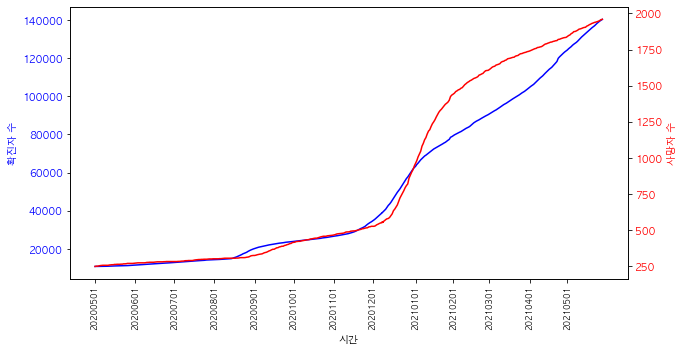

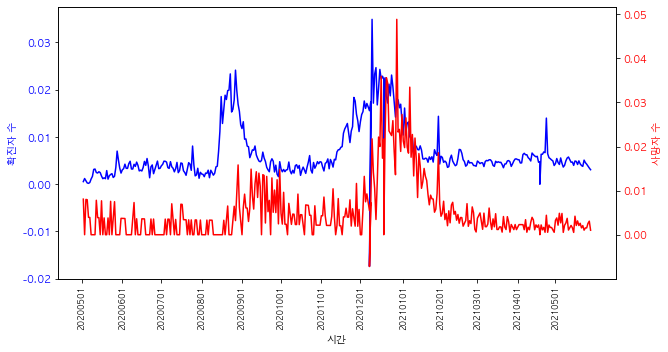

In [1031]:
# 해당 프로그램은 OOP 구조를 통해 '넷플릭스 영화정보' 및 '코로나19 현황정보'를 관리하고 시각화한다.
# 필자는 이 프로그램이 하나의 입력-출력 결과로 나타나기 어렵다고 판단하여 
# 각 클래스의 대표적인 기능을 보여주는 총 4개의 main 함수를 구현하였다. 

if __name__ == "__main__":

    # 클래스 FlixPatrol_MovieInfo
#     print("MAIN1 TEST : FlixPatrol_MovieInfo 객체 테스트\n")
#     main1()
#     print()   
    
    # 클래스 FlixPatrol_Top10
#     print("MAIN 2 : FlixPatrol_Top10 객체 테스트\n")
#     main2()
#     print()

    # 클래스 Annual_FlixPatrol_Top10
#     print("MAIN 3 : Annual_FlixPatrol_Top10 클래스 테스트\n")
#     main3()
#     print()

    # 클래스 COVID_Data
    print("MAIN 4 : COVID_Data 클래스 테스트\n")
    main4()
    print()